In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit

In [19]:
df = pd.read_csv('allR.csv')
df['efficiency'] = df['attack'] / df['exchange']

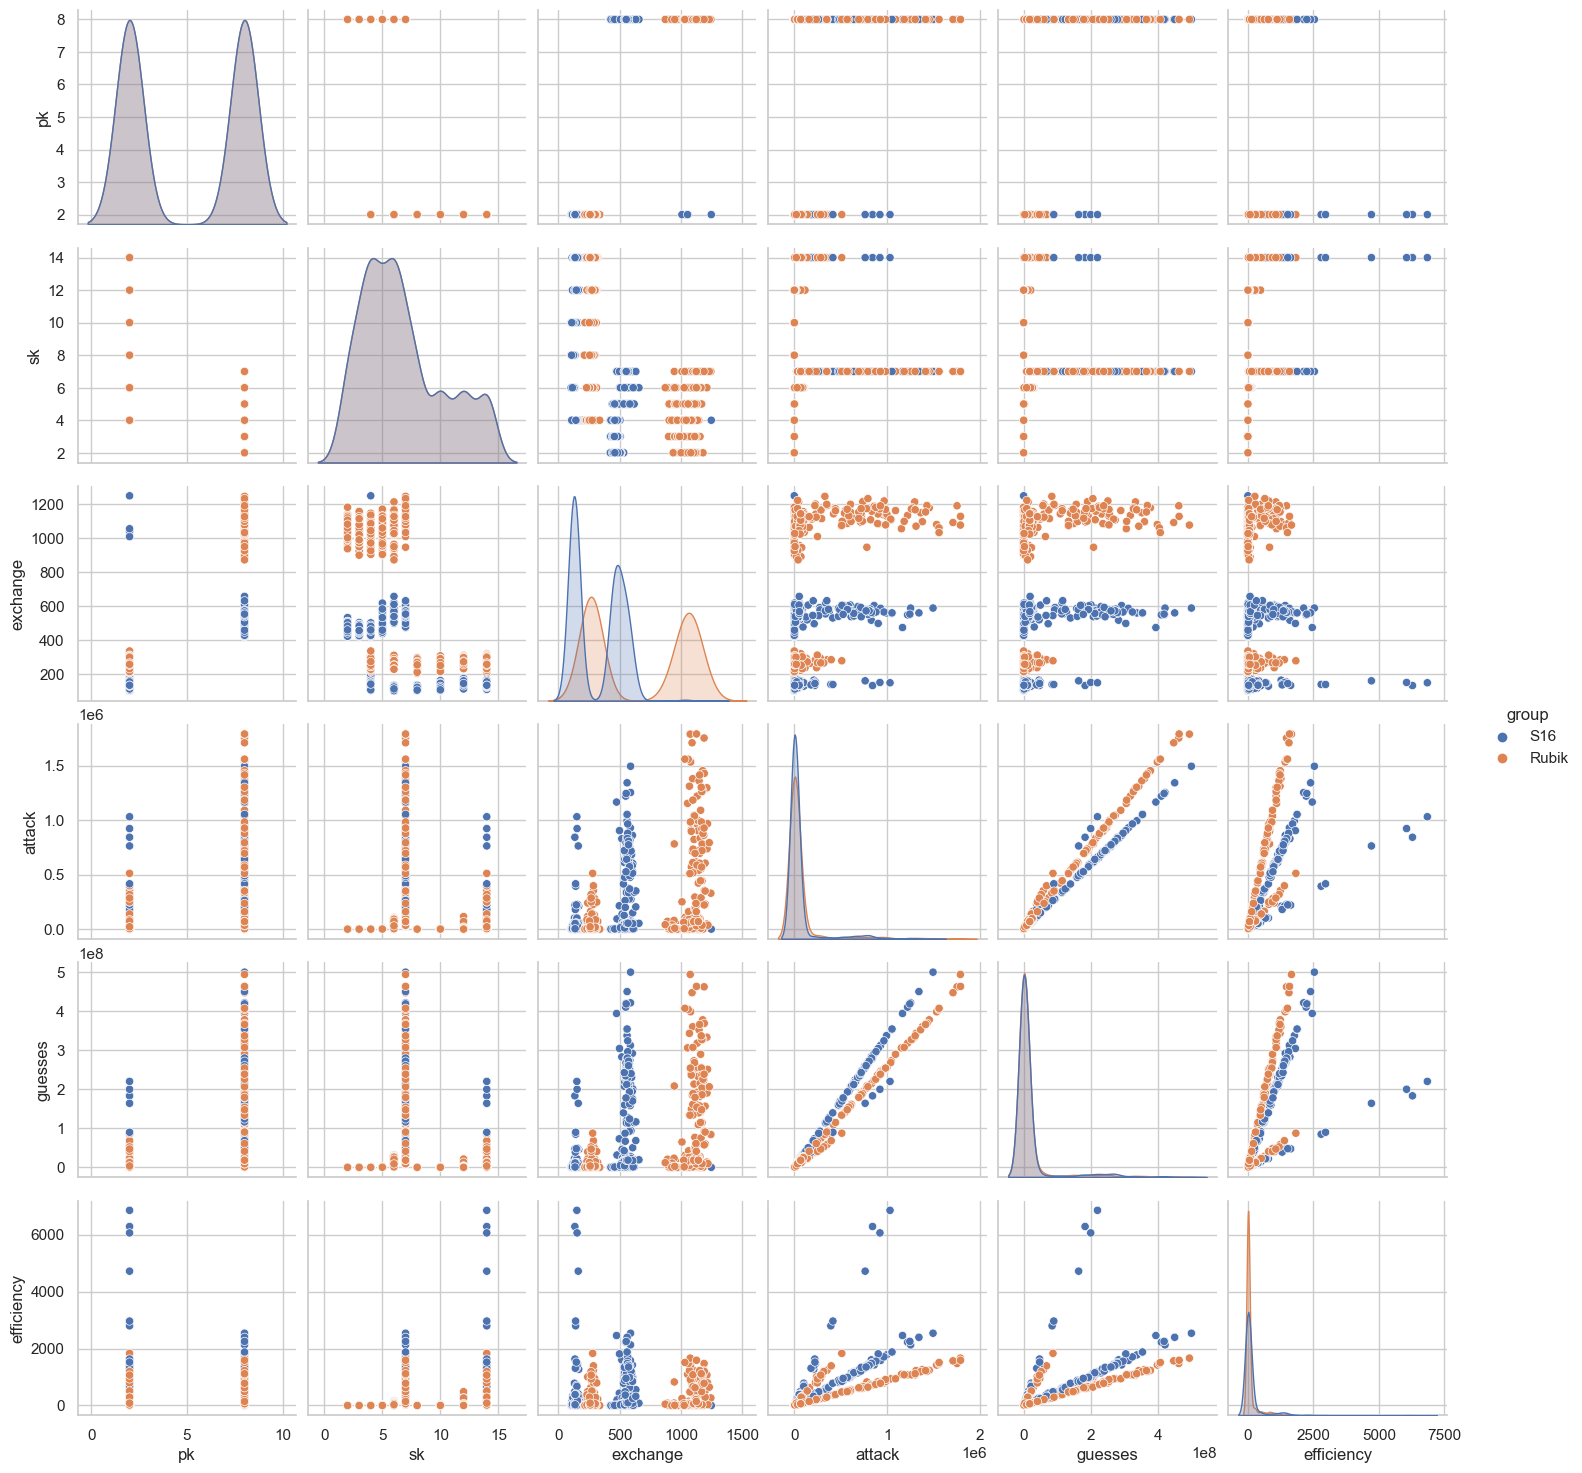

In [20]:
sns.set_theme(style="whitegrid")
gfg = sns.pairplot(data=df, hue='group')
plt.show()

S16: -0.005755667099292676, 0.4864381399000679, 19409446.307123728 28.85126309244631
Rubik: -0.0048095916083047046, 0.4984917875886779, 18813307.992878176 28.815537553770685


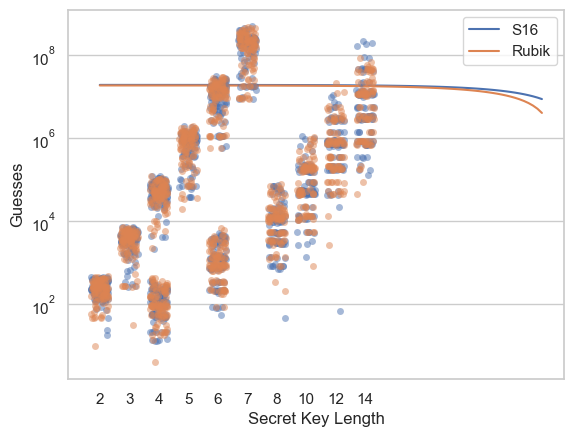

In [22]:
# compare effects of sk and cardinality on attack time/exchange time
sns.set_theme(style="whitegrid")
#gfg = sns.lmplot(data=df[df.sk<=5], x='sk', y='guesses', hue='group', palette='Set2', fit_reg=False, legend=False)

# for each group, perform regression
for group in ['S16', 'Rubik']:
    df_group = df[(df.group == group)]
    sns.stripplot(data=df_group, x='sk', y='guesses', alpha=0.5, jitter=0.3)
    #plt.scatter(df_group['sk'], df_group['guesses'], label=group, alpha=0.5)

    def func(x, a, b, c, d):
        return (a * np.exp(b * (x+d))) + c
    popt, pcov = curve_fit(func, df_group['sk'], df_group['guesses'], p0=(0, 1, 0, -1), bounds=([-np.inf, -np.inf, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf]))
    a, b, c, d = popt
    #a, b = np.polyfit(df_group['sk'], np.log(df_group['guesses']), 1)
    print(f'{group}: {a}, {b}, {c} {d}')
    x = np.linspace(0, max(df_group['sk'])+1, 100)
    y = func(x, *popt)

    # generate dataframe
    #df2 = pd.DataFrame({'x': x, 'y': y})
    sns.lineplot(x=x, y=y, label=group)
    #plt.plot(x, y, label=group)
leg = plt.legend()
plt.yscale('log')
plt.xlabel("Secret Key Length")
plt.ylabel("Guesses")
plt.show()

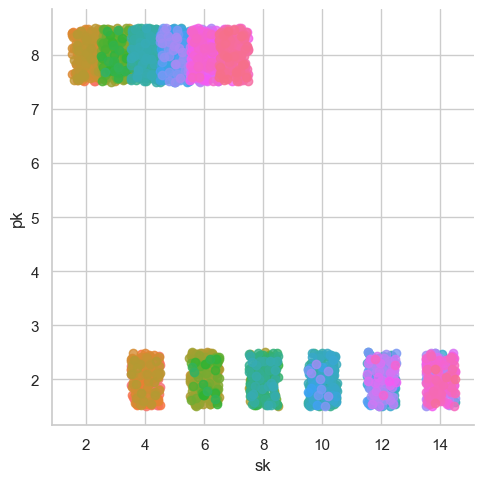

In [26]:
# plot sk and pk length against each other, color=time
sns.set_theme(style="whitegrid")
gfg = sns.lmplot(data=df, x='sk', y='pk', hue='attack', fit_reg=False, legend=False, x_jitter=0.5, y_jitter=0.5)
plt.show()

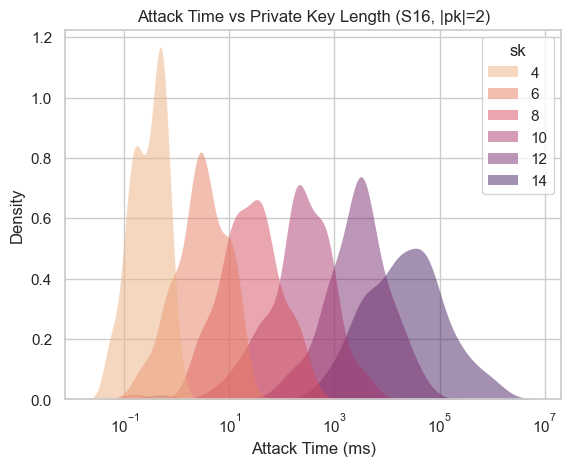

In [31]:
sns.set_theme(style="whitegrid")
gfg = sns.kdeplot(
   data=df[(df.group=='S16') & (df.pk==2)], x="attack", hue="sk",
   fill=True, common_norm=False, palette="flare",
   alpha=.5, linewidth=0, log_scale=True
)
gfg.set(title="Attack Time vs Private Key Length (S16, |pk|=2)", xlabel="Attack Time (ms)")
plt.show()

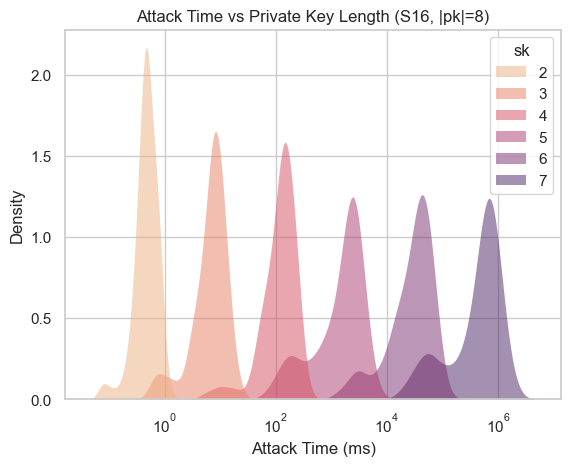

In [32]:
sns.set_theme(style="whitegrid")
gfg = sns.kdeplot(
   data=df[(df.group=='S16') & (df.pk==8)], x="attack", hue="sk",
   fill=True, common_norm=False, palette="flare",
   alpha=.5, linewidth=0, log_scale=True
)
gfg.set(title="Attack Time vs Private Key Length (S16, |pk|=8)", xlabel="Attack Time (ms)")
plt.show()

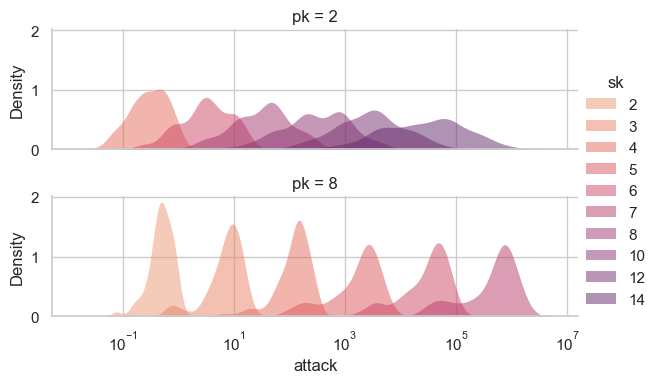

In [56]:
sns.set_theme(style="whitegrid")
g = sns.FacetGrid(df, row="pk", hue="sk", palette="flare", margin_titles=False, sharex=True, sharey=True, height=2, aspect=3)
g.map(sns.kdeplot, "attack", fill=True, common_norm=False, alpha=.5,  linewidth=0, log_scale=True)
g.add_legend()
plt.show()
